### Assignment: Natural Language Processing

In this assignment, you will work with a data set that contains restaurant reviews. You will use a Naive Bayes model to classify the reviews (positive or negative) based on the words in the review.  The main objective of this assignment is gauge the performance of a Naive Bayes model by using a confusion matrix; however in order to ascertain the efficiacy of the model, you will have to first train the Naive Bayes model with a portion (i.e. 70%) of the underlying data set and then test it against the remainder of the data set . Before you can train the model, you will have to go through a sequence of steps to get the data ready for training the model.

Steps you may need to perform:

**1) **Read in the list of restaurant reviews

**2)** Convert the reviews into a list of tokens

**3) **You will most likely have to eliminate stop words

**4)** You may have to utilize stemming or lemmatization to determine the base form of the words

**5) **You will have to vectorize the data (i.e. construct a document term/word matix) wherein select words from the reviews will constitute the columns of the matrix and the individual reviews will be part of the rows of the matrix

**6) ** Create 'Train' and 'Test' data sets (i.e. 70% of the underlying data set will constitute the training set and 30% of the underlying data set will constitute the test set)

**7)** Train a Naive Bayes model on the Train data set and test it against the test data set

**8) **Construct a confusion matrix to gauge the performance of the model

**Dataset**: https://www.dropbox.com/s/yl5r7kx9nq15gmi/Restaurant_Reviews.tsv?raw=1




In [0]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

### Read in the list of restaurant reviews

In [5]:
data = pd.read_csv('https://www.dropbox.com/s/yl5r7kx9nq15gmi/Restaurant_Reviews.tsv?raw=1', sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
print(data.shape)
print(data.isnull().any().any())

(1000, 2)
False


### Convert the Reviews to a List of Tokens
* Remove stop words and punctuation
* Utilize lemmatization

In [0]:
def process_text(sentence):
    # tokenize
    sentence = nltk.word_tokenize(sentence)
    
    # remove stop words and punctuation, lemmatize
    sentence = [wnl.lemmatize(w) for w in sentence 
                if w not in stop_words and w.isalpha()]
    
    return sentence

In [9]:
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

tokens = data.copy()
tokens['Tokens'] = data['Review'].apply(process_text)
tokens.head()

,Review,Liked,Tokens
0,Wow... Loved this place.,1,"[Wow, Loved, place]"
1,Crust is not good.,0,"[Crust, good]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[Stopped, late, May, bank, holiday, Rick, Stev..."
4,The selection on the menu was great and so wer...,1,"[The, selection, menu, great, price]"


### Vectorize Data

In [11]:
corpus = [' '.join(sentence) for sentence in tokens['Tokens']]
corpus[:5]

['Wow Loved place',
 'Crust good',
 'Not tasty texture nasty',
 'Stopped late May bank holiday Rick Steve recommendation loved',
 'The selection menu great price']

In [21]:
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X = vectorizer.transform(corpus).todense()
print(X.shape)

y = tokens['Liked'].values
print(y.shape)

(1000, 1812)
(1000,)


### Train Test Split

In [0]:
np.random.seed(41)
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Naive Bayes

In [25]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [28]:
yhat = clf.predict(X_test)
accuracy = np.mean(y_test==yhat)
print('Model Accuracy: {:.1f}%'.format(accuracy*100))

Model Accuracy: 72.8%


### Confusion Matrix

In [31]:
cnf_matrix = confusion_matrix(y_test, yhat)
print('Confusion Matrix:\n' + str(cnf_matrix))

Confusion Matrix:
[[ 72  51]
 [ 17 110]]


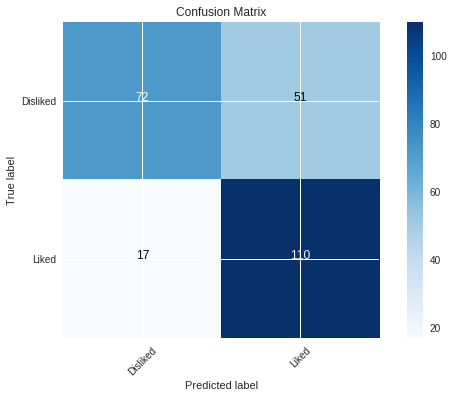

In [35]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Disliked', 'Liked']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix')